# KARACHI PROPERTY PRICE PREDICTION

# PROBLEM STATEMENT

**Our Problem Statement is to analyze the dataset of properties in Karachi and then building a model to predict its price using location, Area(Sq.ft), bedrooms, baths...**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOADING OUR DATA
properties_fe = pd.read_csv("Property_with_Feature_Engineering.csv")


In [4]:
properties_fe.head(2)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B


In [5]:
# Checking cities for subsetting later
print(properties_fe["city"].unique())
properties_fe.shape

['Lahore' 'Karachi' 'Islamabad' 'Faisalabad' 'Rawalpindi']


(191393, 24)

In [6]:
df = properties_fe[properties_fe["city"] == "Karachi"] 
df.head()
df.shape

(60484, 24)

# EDA (EXPLORATORY DATA ANALYSIS):
As there are so much columns so we will be dropping the columns that have either very little importance or can be considered as extras..

In [7]:
# dropping unnecessary columns
col_names = ["location_id","page_url","province_name","locality","area_marla","year","month","day","agency","agent","latitude","longitude","property_id","property_type","price_bin","purpose","date_added","city","area"]
df = df.drop(col_names, axis=1)

In [8]:
df = df.reset_index()
df = df.drop("index",axis=1)
df.head()

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4


In [9]:
# Checking if any null values in the df
df.isna().sum()

price        0
location     0
baths        0
area_sqft    0
bedrooms     0
dtype: int64

In [10]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

df.shape

(60484, 5)

In [11]:
df['bedrooms'].unique()

array([ 6,  3,  2,  4,  7,  5, 11,  0,  1,  9,  8, 10, 15, 12, 14, 13, 16,
       68, 25])

# DATA CLEANING

As You can see in the above cell that there are some properties which have bedrooms even greater than 10...This could be possible that some of them could be typo error while others can be having other errors in them as well like very less baths or no baths...Lets inspect the properties that are having bedrooms more than 13

In [12]:
df[df['bedrooms']>13]

,price,location,baths,area_sqft,bedrooms
2932,350000000,DHA Defence,0,21780.08,15
14349,330000000,DHA Defence,0,21780.08,14
20000,350000,Jamshed Town,0,4900.52,14
46833,150000000,Gulistan-e-Jauhar,6,6534.02,16
50947,2500000,North Nazimabad,0,35937.13,68
52129,550000,Jamshed Town,0,16335.06,25
55102,450000,Gulshan-e-Iqbal Town,0,8167.53,15
55103,900000,Gulshan-e-Iqbal Town,0,16335.06,25
55539,250000,North Nazimabad,0,4900.52,15


Notice how some of them are having no baths and some are having very less number of baths as compared to their bedrooms...

In [13]:
df['baths'].unique()

array([ 7,  8,  3,  1,  4,  6,  0,  5,  2,  9, 10, 13, 11, 12])

Also notice in the above cell that some properties are having upto 12 baths as well, this could be a typo error as well

In [14]:
df = df.drop(df[(df['baths']==0) & (df['bedrooms'] > 3)].index)
df

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
2,21000000,DHA Defence,3,2423.03,3
3,6500000,Malir,1,871.20,2
4,13000000,Gadap Town,4,2613.61,4
...,...,...,...,...,...
60477,14000000,Bahria Town Karachi,4,3811.51,4
60478,4800000,Gadap Town,0,1034.55,2
60480,12500000,Gadap Town,0,2178.01,3
60482,11000000,Gadap Town,0,2123.56,3


In the above cell we are dropping those indexes that are having no baths and having bedrooms greater than 3 cause they can probably be a typo error.

In [15]:
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)

We are also dropping those properties that are either having no bedrooms or no baths in the above cell...

In [16]:
df[df["baths"] > df["bedrooms"]].head(25)

,price,location,baths,area_sqft,bedrooms
0,450000000,Cantt,7,21780.08,6
1,35000000,Gulistan-e-Jauhar,8,4356.02,6
9,12800000,Scheme 33,6,2613.61,5
11,34000000,Cantt,4,3103.66,3
16,17000000,Gulshan-e-Iqbal Town,5,1306.80,4
27,59500000,Malir,6,3811.51,5
29,58500000,Malir,5,3811.51,4
32,58500000,Malir,5,3811.51,4
33,58000000,Malir,5,3811.51,4
37,59500000,Malir,5,3811.51,4


There are some homes that are having more number of baths as compared to its bedrooms which is quite uncommon...

# OUTLIERS DETECTION AND REMOVALS:

In [17]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,price,location,baths,area_sqft,bedrooms,price_per_sqft
0,450000000,Cantt,7,21780.08,6,20661.081135
1,35000000,Gulistan-e-Jauhar,8,4356.02,6,8034.857508
2,21000000,DHA Defence,3,2423.03,3,8666.834501
3,6500000,Malir,1,871.20,2,7460.973370
4,13000000,Gadap Town,4,2613.61,4,4973.963216


We have add a column of price_per_sqft for our feature engineering so that we can remove the outliers from our data....

In [18]:
len(df['location'].unique())

199

In [21]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(40)

location
DHA Defence                   8688
Bahria Town Karachi           7870
Gulistan-e-Jauhar             4332
Gulshan-e-Iqbal Town          3658
Gadap Town                    2230
North Karachi                 2113
North Nazimabad               2097
Scheme 33                     2060
Cantt                         1505
Clifton                       1470
Malir                         1140
Jamshed Town                  1132
Federal B Area                1124
Nazimabad                      934
Korangi                        736
Liaquatabad                    361
Bath Island                    265
Shah Faisal Town               206
Mehmoodabad                    205
Navy Housing Scheme Karsaz     203
New Karachi                    192
Bin Qasim Town                 191
Jinnah Avenue                  181
Shahra-e-Faisal                180
Fazaia Housing Scheme          170
Civil Lines                    169
Garden West                    162
University Road                146
Abul Hassan

In [22]:
len(location_stats[location_stats <= 10])

98

Notice that there are 98 locations that are having properties less than 10 so we can categorize them as others which will help us in dimensionality reduction in our machine learning model.

In [26]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)

In [27]:
df['location'].nunique()

102

Firstly there were 199 unique locations and now we are having only 102 unique locations after dimensionality reduction

In [28]:
df[df['area_sqft'] / df['bedrooms'] < 300]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
5,32000000,DHA Defence,4,1089.00,4,29384.756657
6,4000000,Malir,3,871.20,7,4591.368228
41,4500000,Saddar Town,1,353.93,2,12714.378549
53,100000000,Gulshan-e-Iqbal Town,9,2613.61,9,38261.255505
91,3500000,Abul Hassan Isphani Road,3,1388.48,5,2520.742106
...,...,...,...,...,...,...
60363,26000,DHA Defence,2,598.95,2,43.409300
60396,110000,DHA Defence,4,598.95,3,183.654729
60399,22000,DHA Defence,1,108.90,1,202.020202
60405,12000000,North Karachi,5,1306.80,5,9182.736455


In the above cell we assume that on  minimum a bedroom must be more than 300 sq.ft so those that were not following that rule in our data we will be removing them as they will be considered as outliers...

In [29]:
df.drop(df[df['area_sqft'] / df['bedrooms'] < 300].index, inplace = True)

In [30]:
df['price_per_sqft'].describe()

count     43904.000000
mean       6658.211901
std        6461.973477
min           0.000184
25%         713.254332
50%        5684.526282
75%        9305.115977
max      316802.953154
Name: price_per_sqft, dtype: float64

Notice how much it is having standard deviation we will reduce it...

In [31]:
# removing price_per_sqft outliers 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

In [32]:
df = remove_pps_outliers(df)
df.shape

(29598, 6)

In [33]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

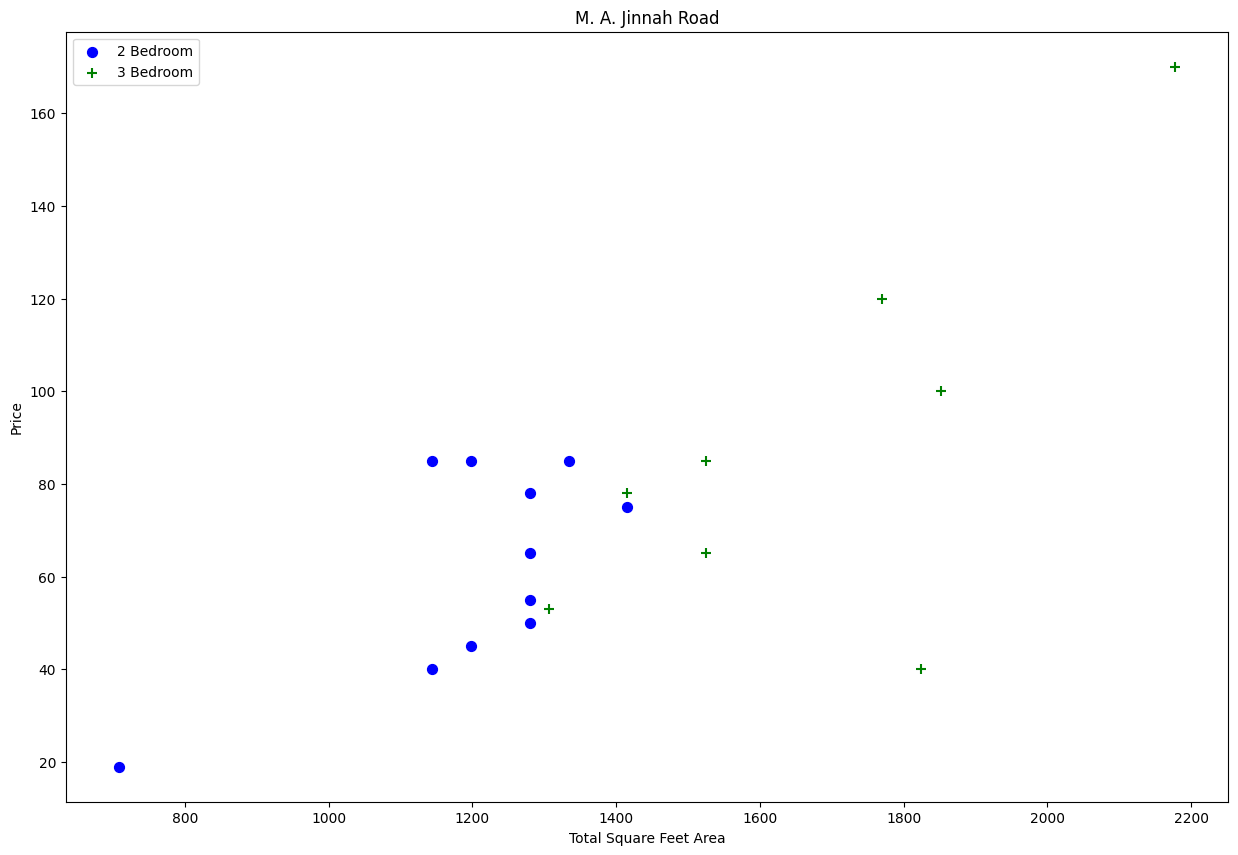

In [33]:
plot_scatter_chart(df, "M. A. Jinnah Road")

Notice in the above graph that there are some properties having 3 bedrooms still in less price than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers and we should also remove them so that they cannot affect our model performance

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["price_per_sqft"]),
                'std' : np.std(bedroom_df["price_per_sqft"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("bedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index") 

In [35]:
df = remove_bhk_outliers(df)
df.shape

(17116, 6)

In [36]:
df.groupby('location')['location'].agg('count').sort_values(ascending=False).head(40)

location
DHA Defence                 3043
Bahria Town Karachi         1878
Gulistan-e-Jauhar           1632
Gulshan-e-Iqbal Town        1405
Gadap Town                  1111
Scheme 33                    905
North Nazimabad              776
North Karachi                636
Clifton                      630
Cantt                        611
Jamshed Town                 464
Federal B Area               383
Nazimabad                    359
Malir                        284
Korangi                      166
others                       157
Liaquatabad                  109
Fazaia Housing Scheme        104
Defence View Society          96
Garden West                   95
Mehmoodabad                   95
Bath Island                   93
Shahra-e-Faisal               87
Shah Faisal Town              84
Jamshed Road                  76
Khalid Bin Walid Road         69
Sea View Apartments           68
Jinnah Avenue                 68
New Karachi                   67
Abul Hassan Isphani Road      66
U

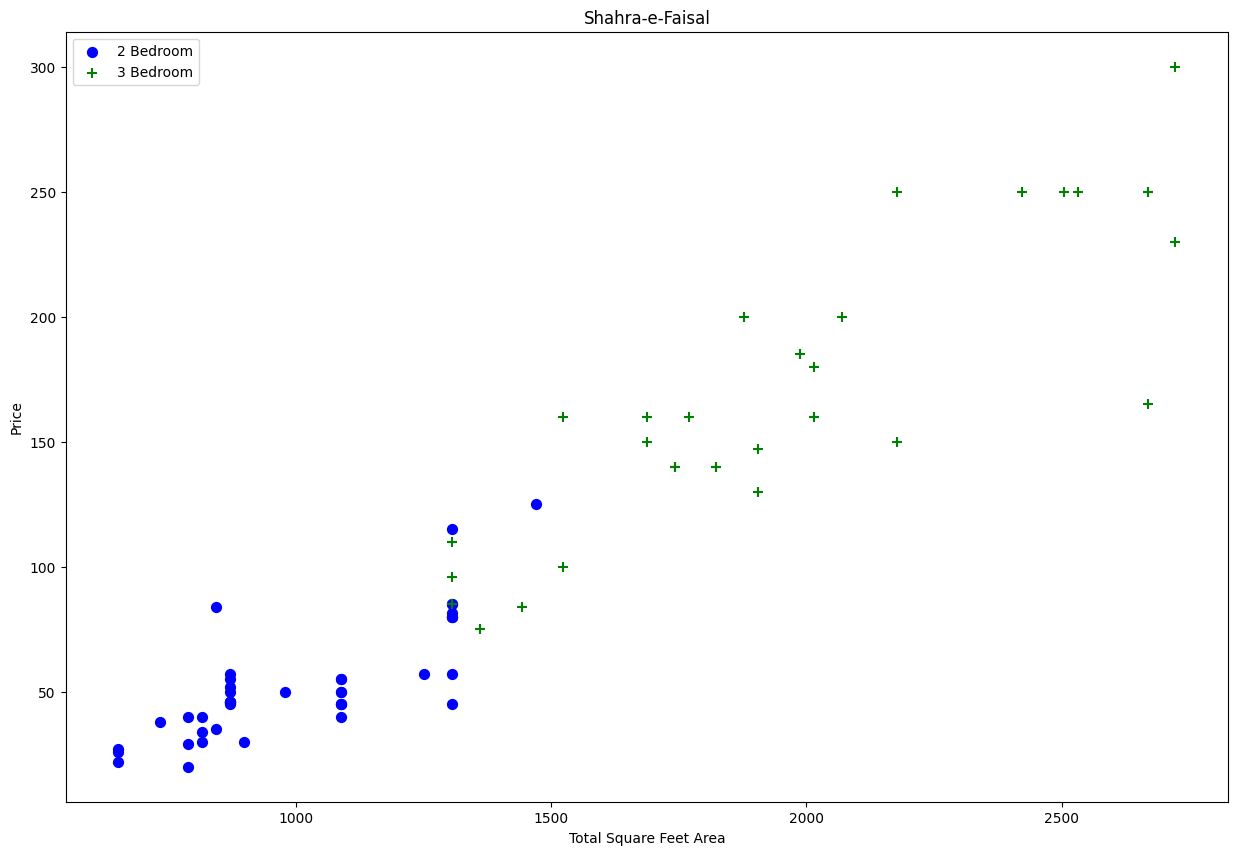

In [37]:
plot_scatter_chart(df,"Shahra-e-Faisal")

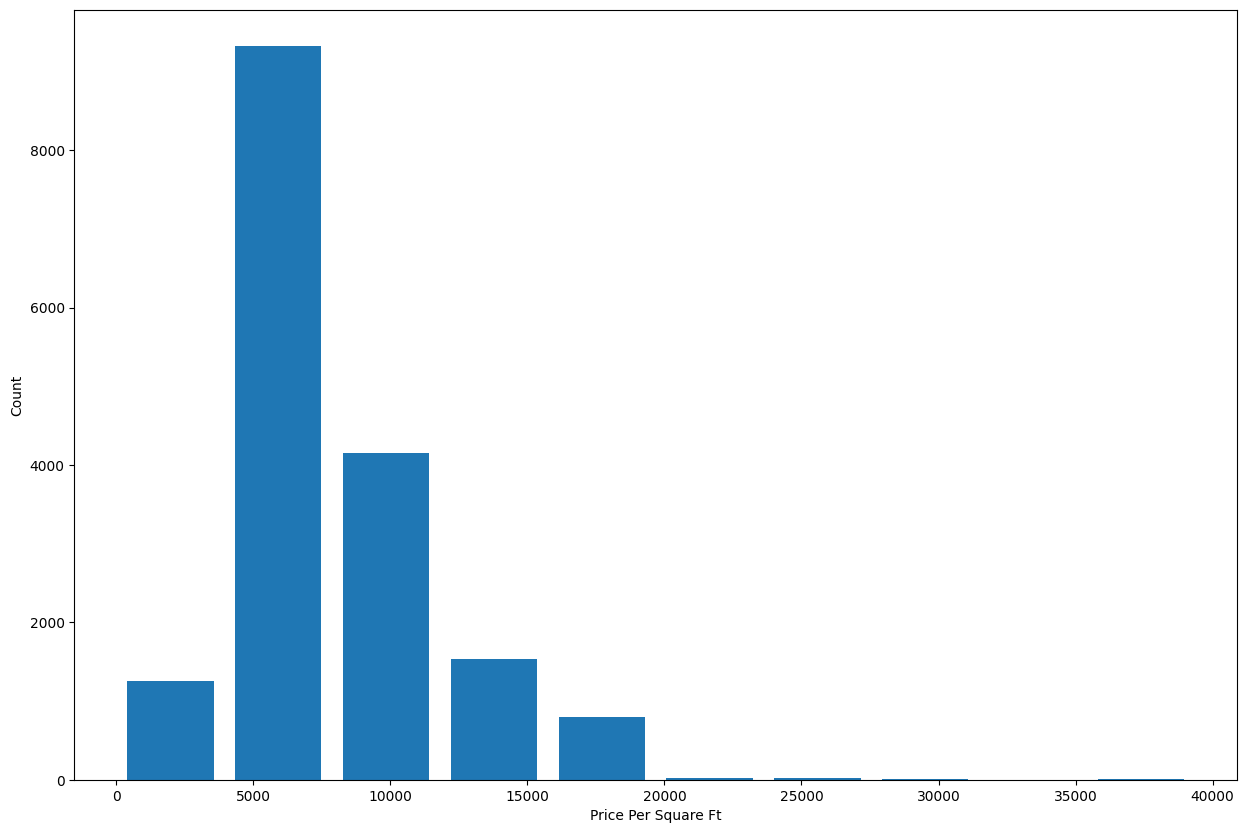

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

Then we plot the graph and 5000 price per square ft is the most common price 

In [39]:
df[df['baths'] > df['bedrooms']]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1,5500000,Abid Town,3,1089.00,2,5050.505051
18,3800000,Abul Hassan Isphani Road,3,1034.55,2,3673.094582
35,3200000,Abul Hassan Isphani Road,3,1442.93,2,2217.709799
102,9500000,Airport,3,1524.61,2,6231.101724
160,5500000,Aisha Manzil,3,871.20,2,6313.131313
...,...,...,...,...,...,...
29548,15000000,others,6,1306.80,4,11478.420569
29562,18000000,others,8,2613.61,7,6887.025991
29575,27500000,others,4,2423.03,3,11349.426132
29582,12500000,others,3,1388.48,2,9002.650380


In [40]:
df[df['baths'] > (df['bedrooms'] + 2)]

,price,location,baths,area_sqft,bedrooms,price_per_sqft
1754,38400000,Bahria Town Karachi,8,5445.02,5,7052.315694
5604,40000000,Cantt,10,3593.71,4,11130.558671
6438,9000000,Clifton,6,898.43,2,10017.474928
7303,50000,Clifton,5,1197.90,2,41.739711
7582,24500000,DHA City Karachi,6,38115.14,2,642.789191
8773,85000000,DHA Defence,8,5445.02,5,15610.594635
9406,100000000,DHA Defence,8,5445.02,5,18365.405453
10915,95000000,DHA Defence,8,6534.02,5,14539.288218
10964,85000000,DHA Defence,6,5445.02,3,15610.594635
14317,20000,Defence View Society,7,871.20,2,22.956841


In [41]:
df = df.drop(df[df['baths'] > (df['bedrooms'] + 2)].index)
df.shape

(17085, 6)

In [42]:
df1 = df.drop("price_per_sqft", axis=1)

In [43]:
dummies = pd.get_dummies(df1['location'])
dummies.head(3)

,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,Azam Town,Bagh-e-Korangi,Bahria Town Karachi,...,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


First we make dummies of our locations

In [44]:
df1 = pd.concat([df1, dummies.drop('others', axis=1)], axis="columns")
df1 = df1.drop("location", axis=1)
df1.head()
df1.shape

(17085, 105)

Then we concat them with our data...

# MODEL BUILDING AND EVALUATION

In [45]:
X = df1.drop('price', axis=1) # Features
X.head()

,baths,area_sqft,bedrooms,Abid Town,Abul Hassan Isphani Road,Airport,Aisha Manzil,Al-Hilal Society,Amir Khusro,Anda Mor Road,...,Shahra-e-Faisal,Shahra-e-Qaideen,Shahrah-e-Pakistan,Sindh Industrial Trading Estate (SITE),Suparco Road,Super Highway,Tariq Road,Tipu Sultan Road,University Road,Zamzama
0,3,1932.98,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1089.00,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1089.00,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,1442.93,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1388.48,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
y = df1['price'] # Predictor or predicted_variable
y.head()

0    8500000
1    5500000
2    6500000
3    5600000
4    8150000
Name: price, dtype: int64

As the price of property is continuous so we will be using regression models 

In [47]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8371271499563053

Note that our linear regression model performs with 83% accuracy which is quite good...

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82409662, 0.86694765, 0.81835746, 0.83910549, 0.83268318])

Then use shuffle split for our cross validation and it gives the maximum accuracy of 86%...

In [49]:
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model':LinearRegression(),
            'params': {'fit_intercept': [True, False],'positive': [True, False]}
    
        },'decision_tree_regressor':{
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse','friedman_mse'], 'splitter':['best','random']}
        },'lasso': {
            'model':Lasso(),
            'params': {'alpha':[1,2], 'selection':['random','cyclic']}
        }
    }
    
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_ ,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [52]:
find_best_model_using_gridsearchcv(X, y)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

,model,best_score,best_params
0,linear_regression,0.836238,"{'fit_intercept': True, 'positive': False}"
1,decision_tree_regressor,0.936529,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.836239,"{'alpha': 2, 'selection': 'cyclic'}"


As decision_tree_regressor performs the best with 93% accuracy we will be using its best params and bulding our model...

In [53]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X, y)

,criterion,'friedman_mse'
,splitter,'random'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [54]:
X.columns

Index(['baths', 'area_sqft', 'bedrooms', 'Abid Town',
       'Abul Hassan Isphani Road', 'Airport', 'Aisha Manzil',
       'Al-Hilal Society', 'Amir Khusro', 'Anda Mor Road',
       ...
       'Shahra-e-Faisal', 'Shahra-e-Qaideen', 'Shahrah-e-Pakistan',
       'Sindh Industrial Trading Estate (SITE)', 'Suparco Road',
       'Super Highway', 'Tariq Road', 'Tipu Sultan Road', 'University Road',
       'Zamzama'],
      dtype='object', length=104)

In [55]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [58]:
print(str(int(predict_price('Nazimabad', 700, 4, 4))) + " Lakhs")

65 Lakhs


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [60]:
print(str(int(predict_price('Scheme 33', 1080, 3, 2))) + " Lakhs")

80 Lakhs


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [71]:
print(str(int(predict_price('Scheme 33', 1000, 6, 3))) + " Lakhs")

150 Lakhs


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
